### Import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from keras.utils.vis_utils import plot_model
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from timeit import default_timer as timer
import os
import random
import glob
import shutil

In [ ]:
tf.__version__

'2.8.0'

### Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks/Advanced Topics Course/Final Project")

Mounted at /content/drive


In [ ]:
train_path = "train_new"
valid_path = "valid_new"
test_path = "test_new"

classes = classes = ["affenpinscher", 
           "afghan_hound", 
           "african_hunting_dog",
           "airedale",
           "american_staffordshire_terrier",
           "appenzeller",
           "australian_terrier",
           "basenji",
           "basset",
           "beagle",
           "bedlington_terrier",
           "bernese_mountain_dog",
           "black-and-tan_coonhound",
           "blenheim_spaniel",
           "bloodhound",
           "bluetick",
           "border_collie",
           "border_terrier",
           "borzoi",
           "boston_bull",
           "bouvier_des_flandres",
           "boxer",
           "brabancon_griffon",
           "briard",
           "brittany_spaniel",
           "bull_mastiff",
           "cairn",
           "cardigan",
           "chesapeake_bay_retriever",
           "chihuahua",
           "chow",
           "clumber",
           "cocker_spaniel",
           "collie",
           "curly-coated_retriever",
           "dandie_dinmont",
           "dhole",
           "dingo",
           "doberman",
           "english_foxhound",
           "english_setter",
           "english_springer",
           "entlebucher",
           "eskimo_dog",
           "flat-coated_retriever",
           "french_bulldog",
           "german_shepherd",
           "german_short-haired_pointer",
           "giant_schnauzer",
           "golden_retriever",
           "gordon_setter",
           "great_dane",
           "great_pyrenees",
           "greater_swiss_mountain_dog",
           "groenendael",
           "ibizan_hound",
           "irish_setter",
           "irish_terrier",
           "irish_water_spaniel",
           "irish_wolfhound",
           "italian_greyhound",
           "japanese_spaniel",
           "keeshond",
           "kelpie",
           "kerry_blue_terrier",
           "komondor",
           "kuvasz",
           "labrador_retriever",
           "lakeland_terrier",
           "leonberg",
           "lhasa",
           "malamute",
           "malinois",
           "maltese_dog",
           "mexican_hairless",
           "miniature_pinscher",
           "miniature_poodle",
           "miniature_schnauzer",
           "newfoundland",
           "norfolk_terrier",
           "norwegian_elkhound",
           "norwich_terrier",
           "old_english_sheepdog",
           "otterhound",
           "papillon",
           "pekinese",
           "pembroke",
           "pomeranian",
           "pug",
           "redbone",
           "rhodesian_ridgeback",
           "rottweiler",
           "saint_bernard",
           "saluki",
           "samoyed",
           "schipperke",
           "scotch_terrier",
           "scottish_deerhound",
           "sealyham_terrier",
           "shetland_sheepdog",
           "shih-tzu",
           "siberian_husky",
           "silky_terrier",
           "soft-coated_wheaten_terrier",
           "staffordshire_bullterrier",
           "standard_poodle",
           "standard_schnauzer",
           "sussex_spaniel",
           "tibetan_mastiff",
           "tibetan_terrier",
           "toy_poodle",
           "toy_terrier",
           "vizsla",
           "walker_hound",
           "weimaraner",
           "welsh_springer_spaniel",
           "west_highland_white_terrier",
           "whippet",
           "wire-haired_fox_terrier",
           "yorkshire_terrier"]


In [ ]:
def get_train_val_batch(path,target_size,classes,batch_size,rotation_range=0,height_shift_range=0.0,horizontal_flip=False, zoom_range=0.0, shuffle = False):
  generator = ImageDataGenerator(preprocessing_function= tf.keras.layers.Rescaling(scale=1./127.5, offset=-1),rotation_range=rotation_range,height_shift_range=height_shift_range,horizontal_flip=horizontal_flip, zoom_range=zoom_range,validation_split=0.1)
  train = generator.flow_from_directory(directory=path,target_size=target_size,batch_size=batch_size,classes=classes, shuffle=shuffle,subset="training")
  val = generator.flow_from_directory(directory=path,target_size=target_size,batch_size=batch_size,classes=classes, shuffle=shuffle,subset="validation")
  return train, val



def get_test_batch(path,target_size,classes,batch_size,rotation_range=0,height_shift_range=0.0,horizontal_flip=False, zoom_range=0.0, shuffle = False):
  return ImageDataGenerator(preprocessing_function=tf.keras.layers.Rescaling(scale=1./127.5, offset=-1),rotation_range=rotation_range,height_shift_range=height_shift_range,horizontal_flip=horizontal_flip, zoom_range=zoom_range).flow_from_directory(directory=path,target_size=target_size,batch_size=batch_size,classes=classes, shuffle=shuffle)

def plotImages(images):
  fig, axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

### Building NN

In [ ]:
def build_model1(input_shape,num_classes ,activation = "relu", summary = True):
  model = Sequential()
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=activation, input_shape=input_shape))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=activation, input_shape=input_shape))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=activation))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation=activation))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation=activation))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation=activation))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation=activation))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Flatten())
  model.add(Dense(units=2000,activation="relu"))
  model.add(Dense(units=1000,activation="relu"))
  model.add(Dense(units=num_classes,activation="softmax"))

  if summary:
    model.summary()
    plot_model(model, show_shapes=True, show_layer_names=True)

  return model


def build_model2(input_shape,num_classes ,activation = "relu", batch_norm= False,dropout = False,regularizer = None, summary = True):
  model = Sequential()
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=activation, input_shape=input_shape))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation=activation))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation=activation))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Flatten())
  if dropout:
    model.add(Dropout(0.5))
  if batch_norm:
    model.add(BatchNormalization())
  model.add(Dense(units=2000,activation=activation,activity_regularizer = regularizer))
  if dropout:
    model.add(Dropout(0.5))
  if batch_norm:
    model.add(BatchNormalization())
  model.add(Dense(units=1000,activation=activation,activity_regularizer = regularizer))
  model.add(Dense(units=num_classes,activation="softmax"))

  if summary:
    model.summary()
    plot_model(model, show_shapes=True, show_layer_names=True)

  return model


### Training NN

In [ ]:
def train_model(model, train_data, valid_data, epochs,optimizer, callbacks, loss = "categorical_crossentropy",metrics=["accuracy"] ):
  time = timer()
  model.compile(optimizer = optimizer, loss = loss,metrics=["accuracy"])
  history = model.fit(x= train_data, epochs=epochs, validation_data=valid_data,callbacks=callbacks , verbose=1)
  total_time = round((timer() - time)/60)
  print(f"Finished training after {total_time} minutes")
  return history

### Visualization of Loss and Accuracy

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  train_accuracy = round(history.history['accuracy'][-4], 2)
  valid_accuracy = round(history.history['val_accuracy'][-4], 2)
  print(f'The model accuracy on train data is: {train_accuracy}')
  print(f'The model accuracy on validation data is: {valid_accuracy}')

def plot_history(history):
  plot_loss(history)
  plot_accuracy(history)

### Making the predictions and evaluating the model

In [ ]:
def test_model(model, test_dataset):
  predictions = model.predict(x=test_dataset, verbose=0)
  return predictions


### Model Performance Evaluation

In [ ]:
def calc_accuracy(y_true, y_pred):
  correct = 0
  for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
      correct += 1
  return (correct/len(y_true))

def eval_preformance(predictions,test_dataset,classes):
  acc = calc_accuracy(test_dataset.classes,np.argmax(predictions, axis=-1))
  print(f"CNN Model, with {acc}% accuracy on test set")

# Experiment number 1:

<h4>Architecture</h4>
For the first model we placed 12 2D Convolution layers which is a filter that “slides” over the 2D input data, performing an elementwise multiplication. As a result, it will be summing up the results into a single output pixel. The kernel will perform the same operation for every location it slides over, transforming a 2D matrix of features into a different 2D matrix of features. At the first few layers these filters will learn low level features like lines edges etc... At the last few layers these filters will learn more high level features that will connect these low level features into a feature vector.
After that we added 3 fully connected layers with the last one being 120 neurons (the number of our classes). The fully connected layers will take the feature vector, performe an elementwise multiplication between each layer, and make a conclusion on which class the image belongs to. Between every 2 2D Convolution layers we added a max pulling layer that decreeces the resolution by 2 times and takes the highest value neuron. The architecture is plotted below.
<h4>Hyper Parameters</h4>
We started to experiment with a learning rate of 0.00005(choosen after many trial and errors),"relu" activation func to add non-linearity and avoid the "Vanishing gradient" issue that comes with sigmoid. batch size of 32 and 10 epochs.
We used early stopping meaning the model will monitor the validation loss as this is the statistical variable that shows how far the model is from a correct prediction, as opposed to accuracy that only shows the amount of times the model has predicted correctly without calculation the score the model gave each class.
<h4>Augmentation</h4>
For data augmentation (as plotted below) we choose to rotate our images randomly between -10 and 10 degrees, shift the images hight between 0% and 10% randomly, flip the images horizontally randomly and zoom them between 0% and 10% randomly.
Because the data we have to work with is very limited, used augmentation to "artificially" increase our data so the model will have more images to study.
<h4>Pre-Proccesing</h4>
Because we choose to rescale our pixels from being a integer bwtween 0 and 255 to being a float between -1 and 1, this will make the training procces easier for a neural network model.
<h4>Data-Preperation</h4>
For data preperation we ran a local script to split the images into train/test split.</br>
we used 10 random images for each class as our test data (resulting in 1200 images for our test data) and the rest went into our training data.</br>
Out of our training data we split 10% of it as our validation data which is used to evaluate and monitor our training proccess and ensure we minimize overfitting as much as posible.
<h4>Training</h4>
To train the first model we enabled the use of GPU as the hardware accelerator as it has many cores therefore uses parallel proccessing which makes the training proccess faster, the loss function we used is categorical crossentropy for a multiclass CNN.

Found 4320 images belonging to 120 classes.
Found 480 images belonging to 120 classes.
Found 1200 images belonging to 120 classes.


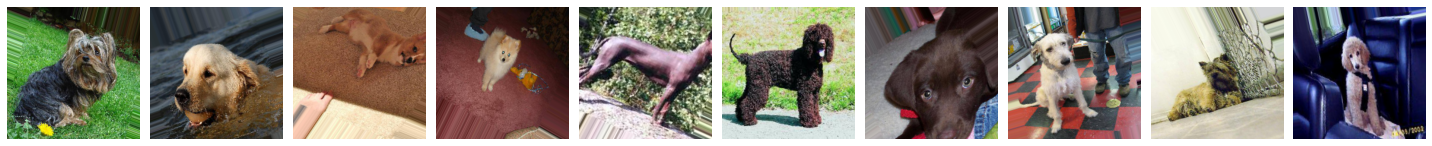

In [ ]:
optimizer = Adam(learning_rate=0.00005)
activation = "relu"
callbacks = []
EPOCHS = 10
BATCH_SIZE = 32
IMAGE_DIM = 224
TARGATE_SIZE = (IMAGE_DIM,IMAGE_DIM)
INPUT_SHAPE = (IMAGE_DIM,IMAGE_DIM,3)

train_batchs,  valid_batchs = get_train_val_batch(train_path,TARGATE_SIZE,classes,BATCH_SIZE,rotation_range=30,height_shift_range=0.2,horizontal_flip=True, zoom_range=0.15, shuffle = True)
test_batchs = get_test_batch(test_path,TARGATE_SIZE,classes,len(classes))

aug_images = [((next(train_batchs)[0][i]+ 1)*127.5).astype(np.uint8) for i in range(10)]
plotImages(aug_images)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

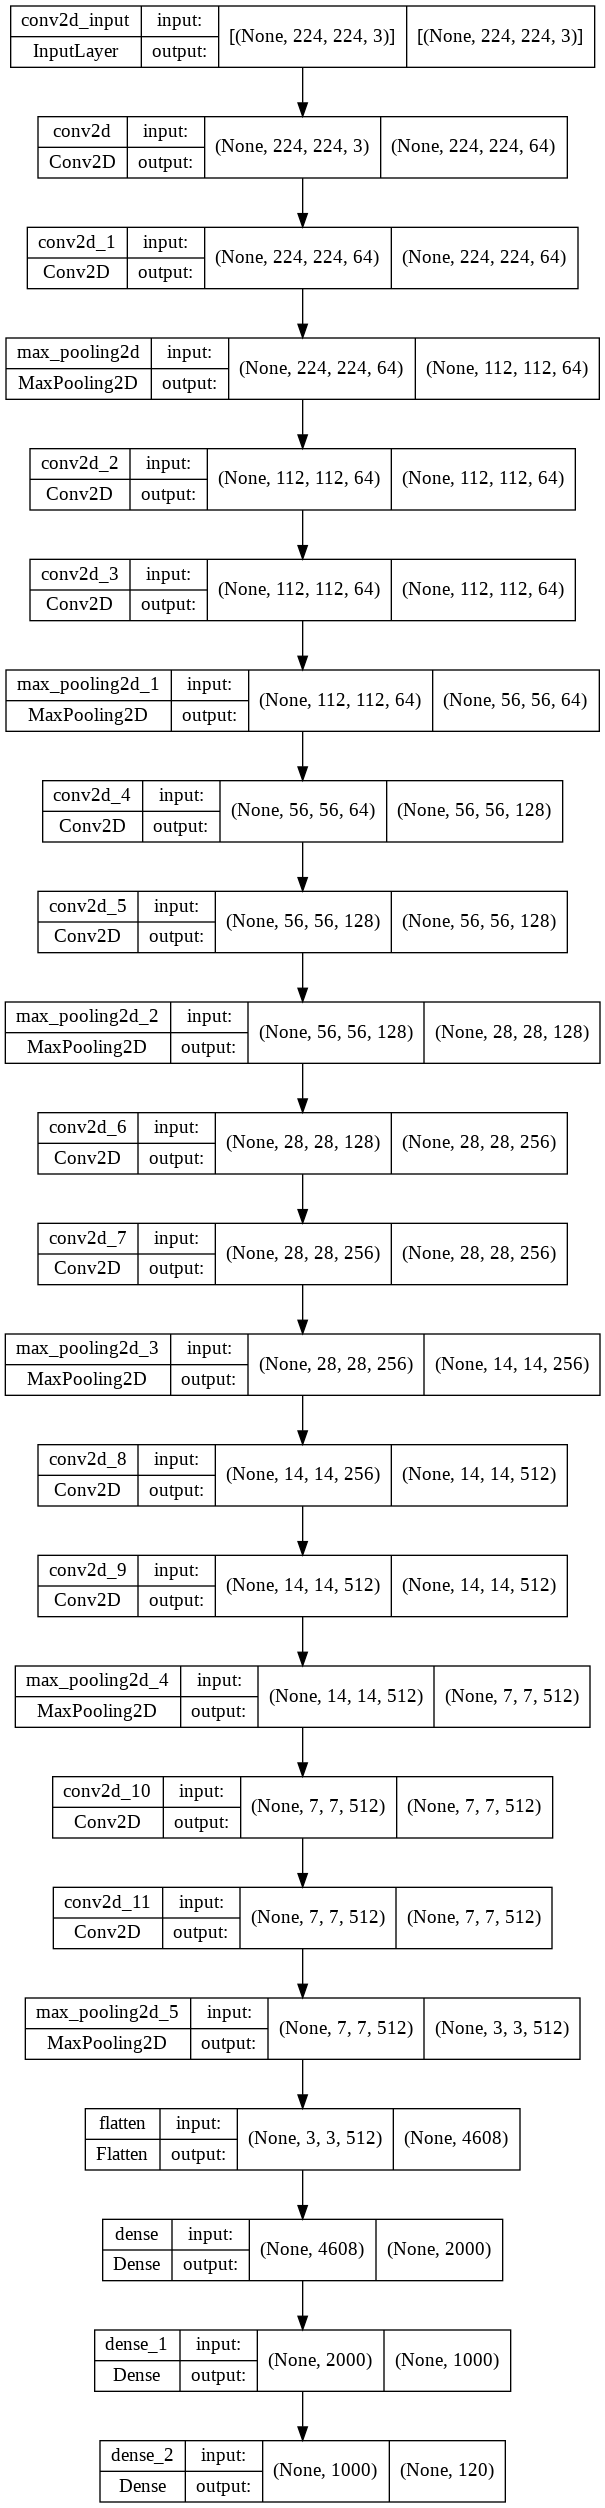

In [ ]:
model1 = build_model1(INPUT_SHAPE,len(classes) ,activation = activation, summary = True)
plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model1, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10
135/135 [==============================] - 2141s 16s/step - loss: 4.7879 - accuracy: 0.0044 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 2/10
135/135 [==============================] - 148s 1s/step - loss: 4.7876 - accuracy: 0.0060 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 3/10
135/135 [==============================] - 149s 1s/step - loss: 4.7876 - accuracy: 0.0063 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 4/10
135/135 [==============================] - 148s 1s/step - loss: 4.7876 - accuracy: 0.0051 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 5/10
135/135 [==============================] - 148s 1s/step - loss: 4.7876 - accuracy: 0.0053 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 6/10
135/135 [==============================] - 148s 1s/step - loss: 4.7876 - accuracy: 0.0074 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 7/10
135/135 [==============================] - 143s 1s/step - loss: 4.7876 - accuracy: 0.0058 - val_loss: 4.7875 - val_accuracy: 0.00

Now that the model has stopped training after 10 epochs, we see that the model has reached 0.83% accuracy on the training and validation set. 

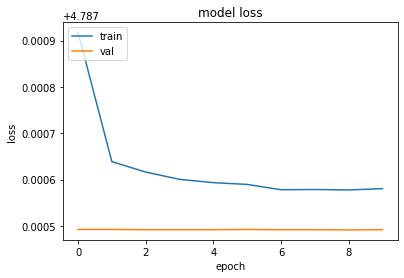

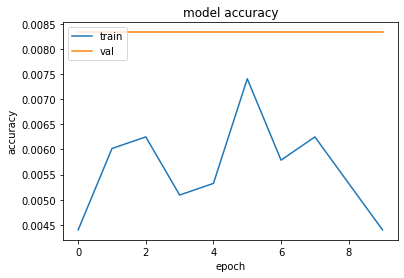

The model accuracy on train data is: 0.01
The model accuracy on validation data is: 0.01


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model1, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.008333333333333333% accuracy on test set


<h4>Conclusions</h4>
We see that this model has failed to learn and even reach overfitting. Our estimation is that this is because it is to complex.

# Experiment number 2:

For this experiment we will try to show that a simpler model is often able to learn better that a deeper and more complex one. Therefore we changed our model architecture to a simpler one resulting in 6 2D Convolution layers insted of 12.
We added Early Stopping to stop the training after 5 epochs that the validation loss did not improve and save the model's best weights.Therefore we also increased out number of epochs to 10000 (because we use early stopping the model is expected to stop learning before we reach that number).


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience = 5, restore_best_weights=True)]
EPOCHS = 10000

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 28, 28, 128)     

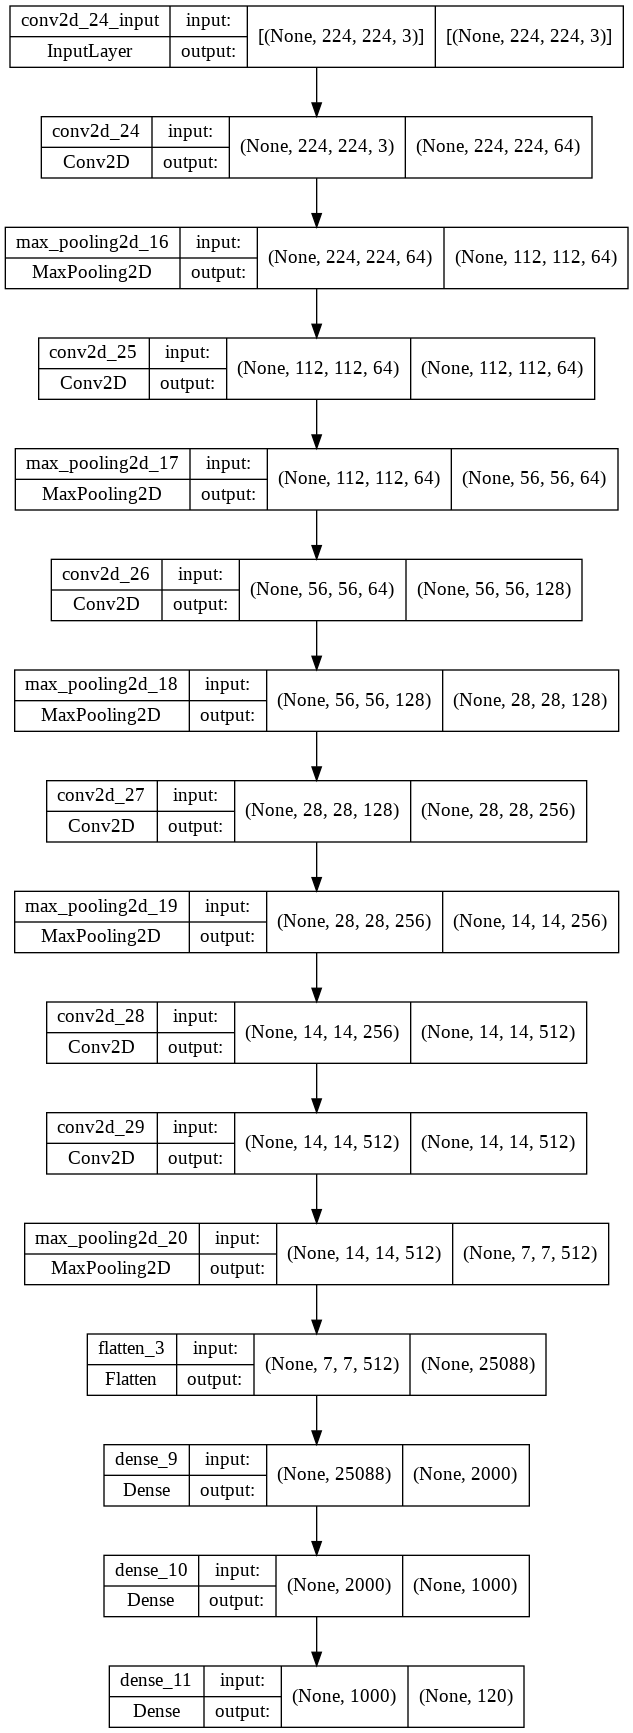

In [ ]:
model2 = build_model2(INPUT_SHAPE,len(classes) ,activation = activation, summary = True)
plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model2, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10000
135/135 [==============================] - 110s 809ms/step - loss: 4.7895 - accuracy: 0.0060 - val_loss: 4.7848 - val_accuracy: 0.0146
Epoch 2/10000
135/135 [==============================] - 108s 801ms/step - loss: 4.7534 - accuracy: 0.0134 - val_loss: 4.6611 - val_accuracy: 0.0229
Epoch 3/10000
135/135 [==============================] - 109s 808ms/step - loss: 4.5906 - accuracy: 0.0271 - val_loss: 4.5533 - val_accuracy: 0.0333
Epoch 4/10000
135/135 [==============================] - 109s 804ms/step - loss: 4.4660 - accuracy: 0.0336 - val_loss: 4.4915 - val_accuracy: 0.0229
Epoch 5/10000
135/135 [==============================] - 109s 805ms/step - loss: 4.3665 - accuracy: 0.0435 - val_loss: 4.4450 - val_accuracy: 0.0375
Epoch 6/10000
135/135 [==============================] - 108s 801ms/step - loss: 4.2911 - accuracy: 0.0493 - val_loss: 4.3996 - val_accuracy: 0.0437
Epoch 7/10000
135/135 [==============================] - 108s 798ms/step - loss: 4.1947 - accuracy: 0.0595

Now that the model has stopped training after 15 epochs, we see that the model has reached 20% accuracy on the training set but the valitaion accuracy only reached 5% and the validation loss has stopped improving after the 10 epoch.

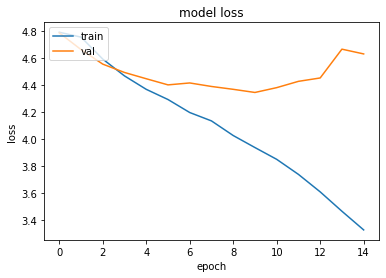

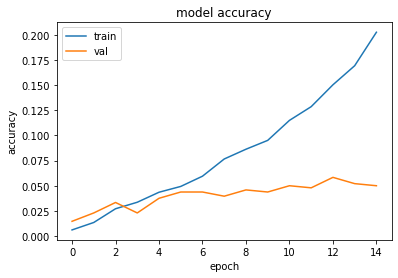

The model accuracy on train data is: 0.13
The model accuracy on validation data is: 0.05


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model2, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.075% accuracy on test set


<h4>Conclusions</h4>
We have showen that a simpler model is more capable to learn this data. But this model is still tending to overfitting.

# Experiment number 3:

For this experiment we have tried to improve over our last model to try and combat overfitting. We added "Dropout" and "Batch Normelization". Dropout layers is when during training the forward pass of your network just randomly set some of the neurons to zero, this does not effect predictions. Batch normalization is a layer that standardizes the inputs to a layer for each mini-batch. It ensures that the inputs to all layers share the same distribution throughout training.
Both tools are effective at combating overfitting. 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 28, 128)     

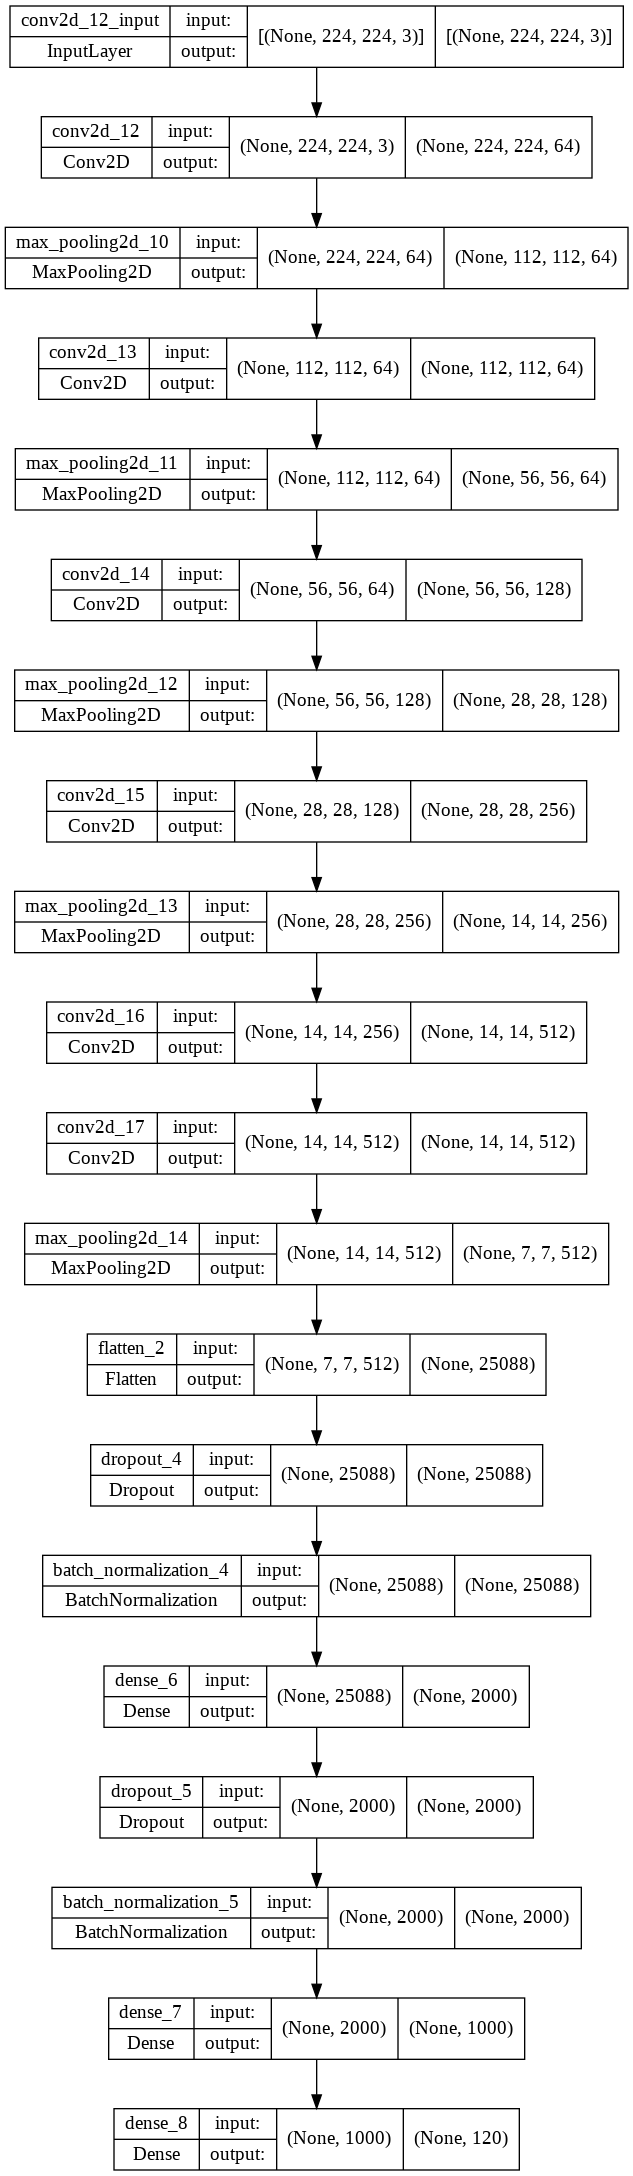

In [ ]:
model3 = build_model2(INPUT_SHAPE,len(classes) ,activation = activation, batch_norm= True,dropout = True, summary = False)


model3.summary()
plot_model(model3, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model3, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10000
135/135 [==============================] - 108s 788ms/step - loss: 5.2406 - accuracy: 0.0069 - val_loss: 5.2036 - val_accuracy: 0.0125
Epoch 2/10000
135/135 [==============================] - 104s 772ms/step - loss: 5.0523 - accuracy: 0.0127 - val_loss: 4.7095 - val_accuracy: 0.0063
Epoch 3/10000
135/135 [==============================] - 104s 767ms/step - loss: 4.9476 - accuracy: 0.0171 - val_loss: 4.7172 - val_accuracy: 0.0229
Epoch 4/10000
135/135 [==============================] - 103s 765ms/step - loss: 4.9058 - accuracy: 0.0211 - val_loss: 4.7688 - val_accuracy: 0.0146
Epoch 5/10000
135/135 [==============================] - 103s 765ms/step - loss: 4.8606 - accuracy: 0.0194 - val_loss: 4.7170 - val_accuracy: 0.0146
Epoch 6/10000
135/135 [==============================] - 104s 769ms/step - loss: 4.7924 - accuracy: 0.0243 - val_loss: 4.6073 - val_accuracy: 0.0292
Epoch 7/10000
135/135 [==============================] - 104s 772ms/step - loss: 4.7738 - accuracy: 0.0264

Now that the model has stopped training after 29 epochs, we see that the model has reached 12% accuracy on the training set but the valitaion accuracy only reached 8% and the validation loss has stopped improving after the 24 epoch.

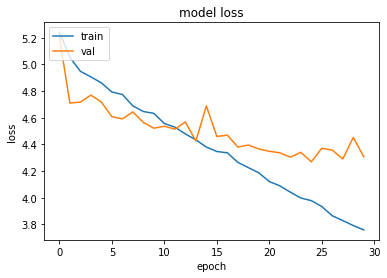

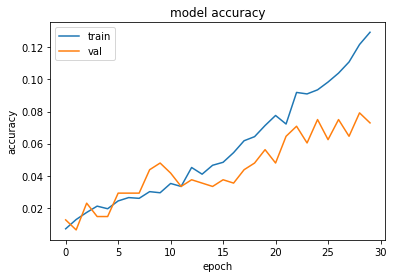

The model accuracy on train data is: 0.1
The model accuracy on validation data is: 0.08


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model3, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.06583333333333333% accuracy on test set


<h4>Conclusions</h4>
We see that the added "Dropout" and "Batch Normelization" layers have greatly improved our models ability to learn more general weights that are not overfitted. We noticed that early stopping stopped the learning proccess altho the validation loss did not clearly diverge as shown in the graph above.

# Experiment number 4 (The Chosen architecture):

For the last experiment we tried to give the model more time to learn so we increased the early stopping patience to 10, we also tried to increase our learning rate to 0.0001 as we felt this will make our training proccess fasted while not hurting the models ability to learn. We added the "L2" regularizer in attempt to have our model learn simpler weights. "L2" regularizer avoids overfitting by panelizing the regression coefficients of high value. More specifically, it decreases the parameters and simplifies the model.

In [ ]:
optimizer = Adam(learning_rate=0.0001)
callbacks = [EarlyStopping(monitor="val_loss", patience = 10, restore_best_weights=True)]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 128)     

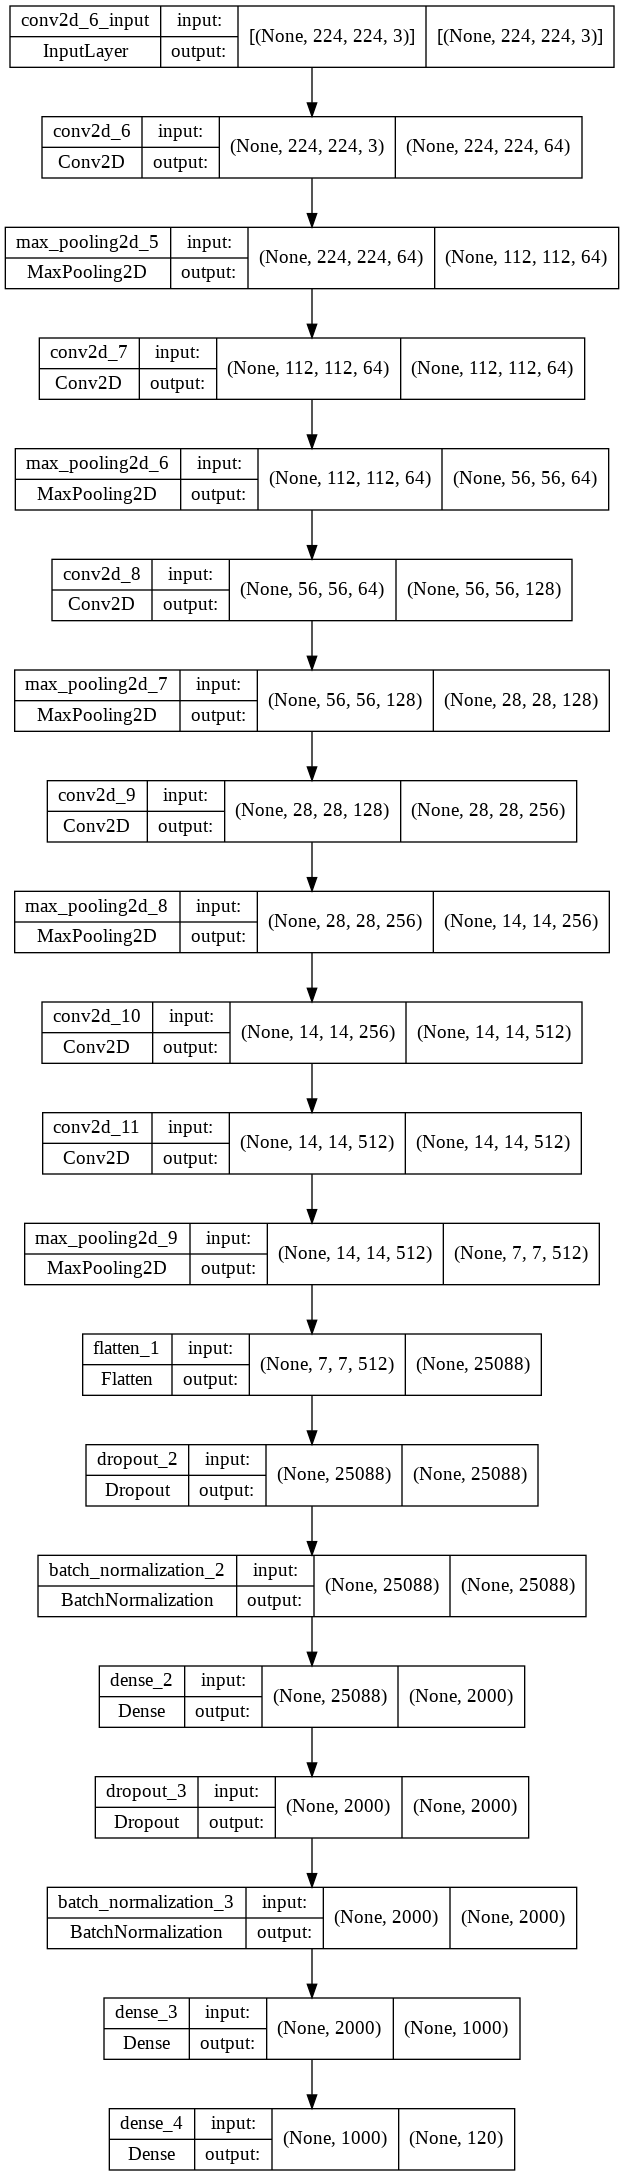

In [ ]:
model4 = build_model2(INPUT_SHAPE,len(classes) ,activation = activation, batch_norm= True,dropout = True, regularizer = regularizers.l2(1e-5), summary = False)


model4.summary()
plot_model(model4, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model4, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10000
135/135 [==============================] - 1236s 9s/step - loss: 5.2299 - accuracy: 0.0116 - val_loss: 4.7935 - val_accuracy: 0.0104
Epoch 2/10000
135/135 [==============================] - 116s 862ms/step - loss: 5.0576 - accuracy: 0.0139 - val_loss: 4.7181 - val_accuracy: 0.0083
Epoch 3/10000
135/135 [==============================] - 115s 852ms/step - loss: 4.9658 - accuracy: 0.0169 - val_loss: 4.5980 - val_accuracy: 0.0354
Epoch 4/10000
135/135 [==============================] - 115s 851ms/step - loss: 4.8520 - accuracy: 0.0238 - val_loss: 4.5722 - val_accuracy: 0.0333
Epoch 5/10000
135/135 [==============================] - 115s 854ms/step - loss: 4.7651 - accuracy: 0.0282 - val_loss: 4.5745 - val_accuracy: 0.0375
Epoch 6/10000
135/135 [==============================] - 115s 855ms/step - loss: 4.6971 - accuracy: 0.0301 - val_loss: 4.7094 - val_accuracy: 0.0250
Epoch 7/10000
135/135 [==============================] - 115s 849ms/step - loss: 4.6314 - accuracy: 0.0343 -

Now that the model has stopped training after 29 epochs, we see that the model has reached 18% accuracy on the training set but the valitaion accuracy only reached 10% and the validation loss has stopped improving after the 19 epoch.

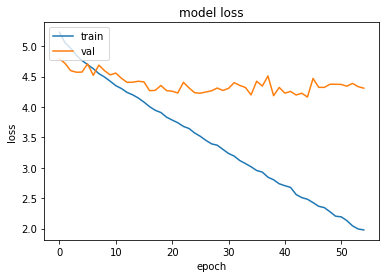

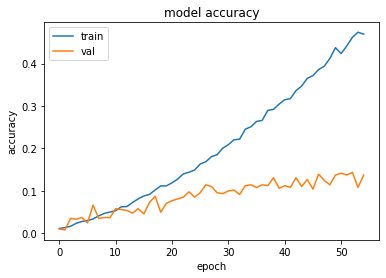

The model accuracy on train data is: 0.44
The model accuracy on validation data is: 0.14


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model4, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.125% accuracy on test set


In [ ]:
model4.save("the_chosen_ground_up_model.h5")

<h4>Conclusions</h4>
We see that the added patience gave our model more time to improve its weight and the added "L2" halped to decrease overfitting even further.